In [ ]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 18 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 18 # control title size
plt.rcParams["axes.labelsize"] = 18 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 18 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 18 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = False
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

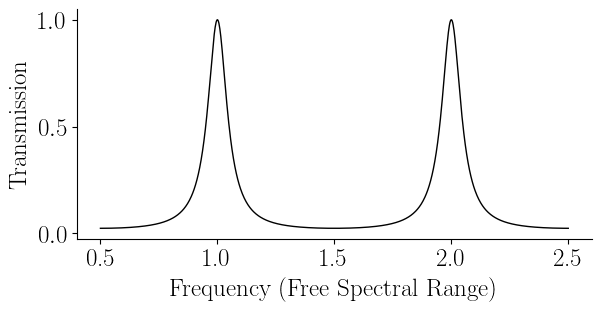

In [29]:
import numpy as np

# Define parameters
finesse = 10  # Finesse of the cavity
FSR = 1.0  # Free Spectral Range (arbitrary units)
frequency = np.linspace(0.5 * FSR, 2.5 * FSR, 1000)  # Frequency range
delta = frequency / FSR  # Normalized frequency

# Calculate transmission using the Airy function
transmission = 1 / (1 + (2 * finesse / np.pi)**2 * np.sin(np.pi * delta)**2)

ax = plt.gca()  # get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot transmission vs frequency
plt.plot(delta, transmission, 'k')
plt.xlabel("Frequency (Free Spectral Range)")
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], ["0.5", "1.0", "1.5", "2.0", "2.5"])
plt.ylabel("Transmission")
# plt.title("Cavity Transmission vs Frequency")
# plt.legend()
plt.savefig("ConventionalLockingTransmissionSignal.pdf", dpi=1200)
plt.show()

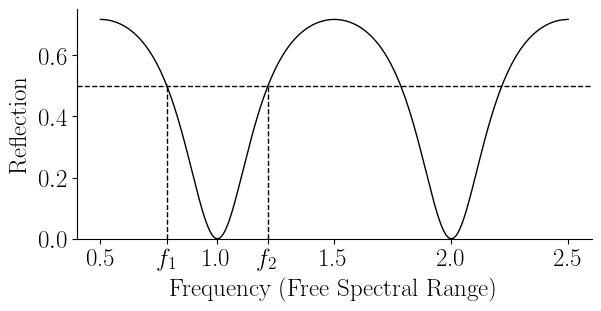

In [118]:
import numpy as np

# Define parameters
finesse = 2.5  # Finesse of the cavity
FSR = 1.0  # Free Spectral Range (arbitrary units)
frequency = np.linspace(0.5 * FSR, 2.5 * FSR, 1000)  # Frequency range
delta = frequency / FSR  # Normalized frequency

# Calculate transmission using the Airy function
transmission = 1 / (1 + (2 * finesse / np.pi)**2 * np.sin(np.pi * delta)**2)

# Calculate reflection using the Airy function
reflection = 1 - transmission

ax = plt.gca()  # get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot reflection vs frequency
plt.plot(delta, reflection, 'k')
plt.axhline(0.5, color='k', lw=1, ls='--')
plt.axvline(delta[142], color='k', lw=1, ls='--',ymin=0, ymax=0.675)
plt.axvline(delta[357], color='k', lw=1, ls='--',ymin=0, ymax=0.675)
plt.xlabel("Frequency (Free Spectral Range)")
# plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5], ["0.5", "1.0", "1.5", "2.0", "2.5"])
plt.xticks(
    [0.5, 1.0, 1.5, 2.0, 2.5, delta[142], delta[357]],  # Positions of the ticks
    ["0.5", "1.0", "1.5", "2.0", "2.5", r"$f_{1}$", r"$f_{2}$"]  # Labels for the ticks
    )
plt.ylim(0, 0.75)
plt.ylabel("Reflection")
# plt.annotate(r"$f_{1}$", xy=(delta[200], 0.50), xytext=(delta[200] - 0.3, 0.35),
#              arrowprops=dict(facecolor='black',lw=0.1),
#              fontsize=18,
#              )
# plt.annotate(r"$f_{2}$", xy=(delta[275], 0.50), xytext=(delta[275] + 0.2, 0.35),
#                 arrowprops=dict(facecolor='black',lw=0.1),
#                 fontsize=18,
#                 )
# plt.title("Cavity Reflection vs Frequency")
# plt.legend()
plt.savefig("ConventionalLockingReflectionSignal.pdf", dpi=1200)
plt.show()

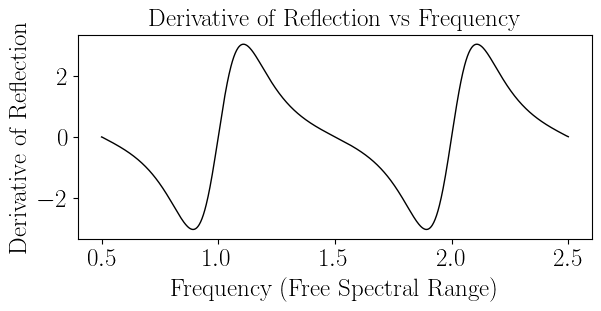

In [119]:
# Calculate the derivative of the reflection signal
reflection_derivative = np.gradient(1 - transmission, delta)

# Plot the derivative of the reflection signal
plt.plot(delta, reflection_derivative, 'k')
plt.xlabel("Frequency (Free Spectral Range)")
plt.ylabel("Derivative of Reflection")
plt.title("Derivative of Reflection vs Frequency")
plt.show()

In [184]:
## Plot the above reflection and derivative signals together

# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

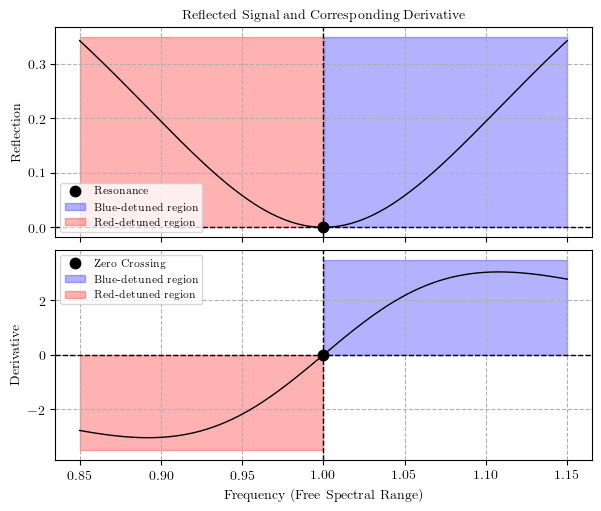

In [188]:
# Define parameters
finesse = 2.5  # Finesse of the cavity
FSR = 1.0  # Free Spectral Range (arbitrary units)
frequency = np.linspace(0.85 * FSR, 1.15 * FSR, 1000)  # Frequency range
delta = frequency / FSR  # Normalized frequency

# Calculate transmission using the Airy function
transmission = 1 / (1 + (2 * finesse / np.pi)**2 * np.sin(np.pi * delta)**2)

# Calculate reflection using the Airy function
reflection = 1 - transmission

# Calculate the derivative of the reflection signal
reflection_derivative = np.gradient(reflection, delta)

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot reflection on the first subplot
ax1.plot(delta, reflection, 'k')
ax1.plot(1,0,'ko', markersize=7.5, label="Resonance")
ax1.axhline(0, color='k', lw=1, ls='--')
ax1.axvline(1, color='k', lw=1, ls='--')
ax1.set_ylabel("Reflection")
ax1.set_title("Reflected Signal and Corresponding Derivative")

# Plot derivative of reflection on the second subplot
ax2.plot(delta, reflection_derivative, 'k')
ax2.set_xlabel("Frequency (Free Spectral Range)")
ax2.set_ylabel("Derivative")
ax2.plot(1,0,'ko', markersize=7.5, label="Zero Crossing")
ax2.axhline(0, color='k', lw=1, ls='--')
ax2.axvline(1, color='k', lw=1, ls='--')


# add a blue alpha=0.5 box for regions right of the zero crossing for reflection plot
ax1.fill_between(delta, 0, 0.35, where=(delta > 1), color='blue', alpha=0.3, label="Blue-detuned region")
# add a blue alpha=0.5 box for the top right quadrant of the derivative plot
ax2.fill_between(delta, 0, 3.5, where=(delta > 1), color='blue', alpha=0.3, label="Blue-detuned region")
# add a red alpha=0.5 box for regions left of the zero crossing for reflection plot
ax1.fill_between(delta, 0, 0.35, where=(delta < 1), color='red', alpha=0.3, label="Red-detuned region")
# add a red alpha=0.5 box for the top left quadrant of the derivative plot
ax2.fill_between(delta, -3.5, 0, where=(delta < 1), color='red', alpha=0.3, label="Red-detuned region")

# Add legends to both subplots
ax1.legend(loc='lower left')
ax2.legend(loc='upper left')

# Show the plots
# plt.tight_layout()
plt.savefig("ConventionalLockingDerivativeReflectionSignal.pdf", dpi=1200)
plt.show()

In [223]:
## Plot the above reflection and derivative signals together

# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

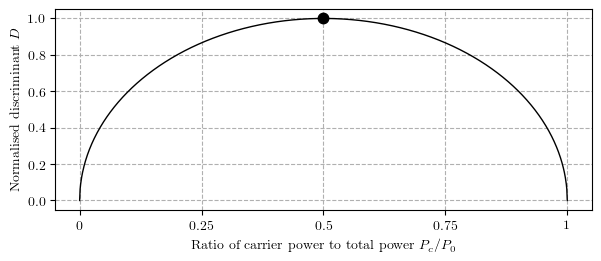

In [246]:
# Plotting discriminant signal D

x = np.linspace(0, 1, 1000)  # x values from 0 to 1

y = []
for i in x:
    y.append(np.sqrt((1-i)*i)*2)

plt.plot(x, y, 'k')
plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
plt.ylabel("Normalised discriminant $D$")
plt.xlabel("Ratio of carrier power to total power $P_c/P_0$")
plt.plot(0.5, 1.0, 'ko', markersize=7.5, label="Optimal power ratio")
plt.savefig("DiscriminantForOptimalModulationDepth.pdf", dpi=1200)